In [3]:
words = open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words) 

2

In [6]:
max(len(w) for w in words) 

15

BIGRAM LANGUAGE MODEL

In [7]:
b = {}
for w in words:
    char = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(char,char[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1  

In [8]:
sorted(b.items(),key=lambda x : -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
import torch 

In [10]:
N = torch.zeros((27,27),dtype=torch.int32)

In [11]:
chars = sorted(list(set(''.join(words))))
print(chars)
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [12]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [18]:

for w in words:
    char = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(char,char[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1  

In [19]:
N[0,0].item()

0

Visualization of our Tensor

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

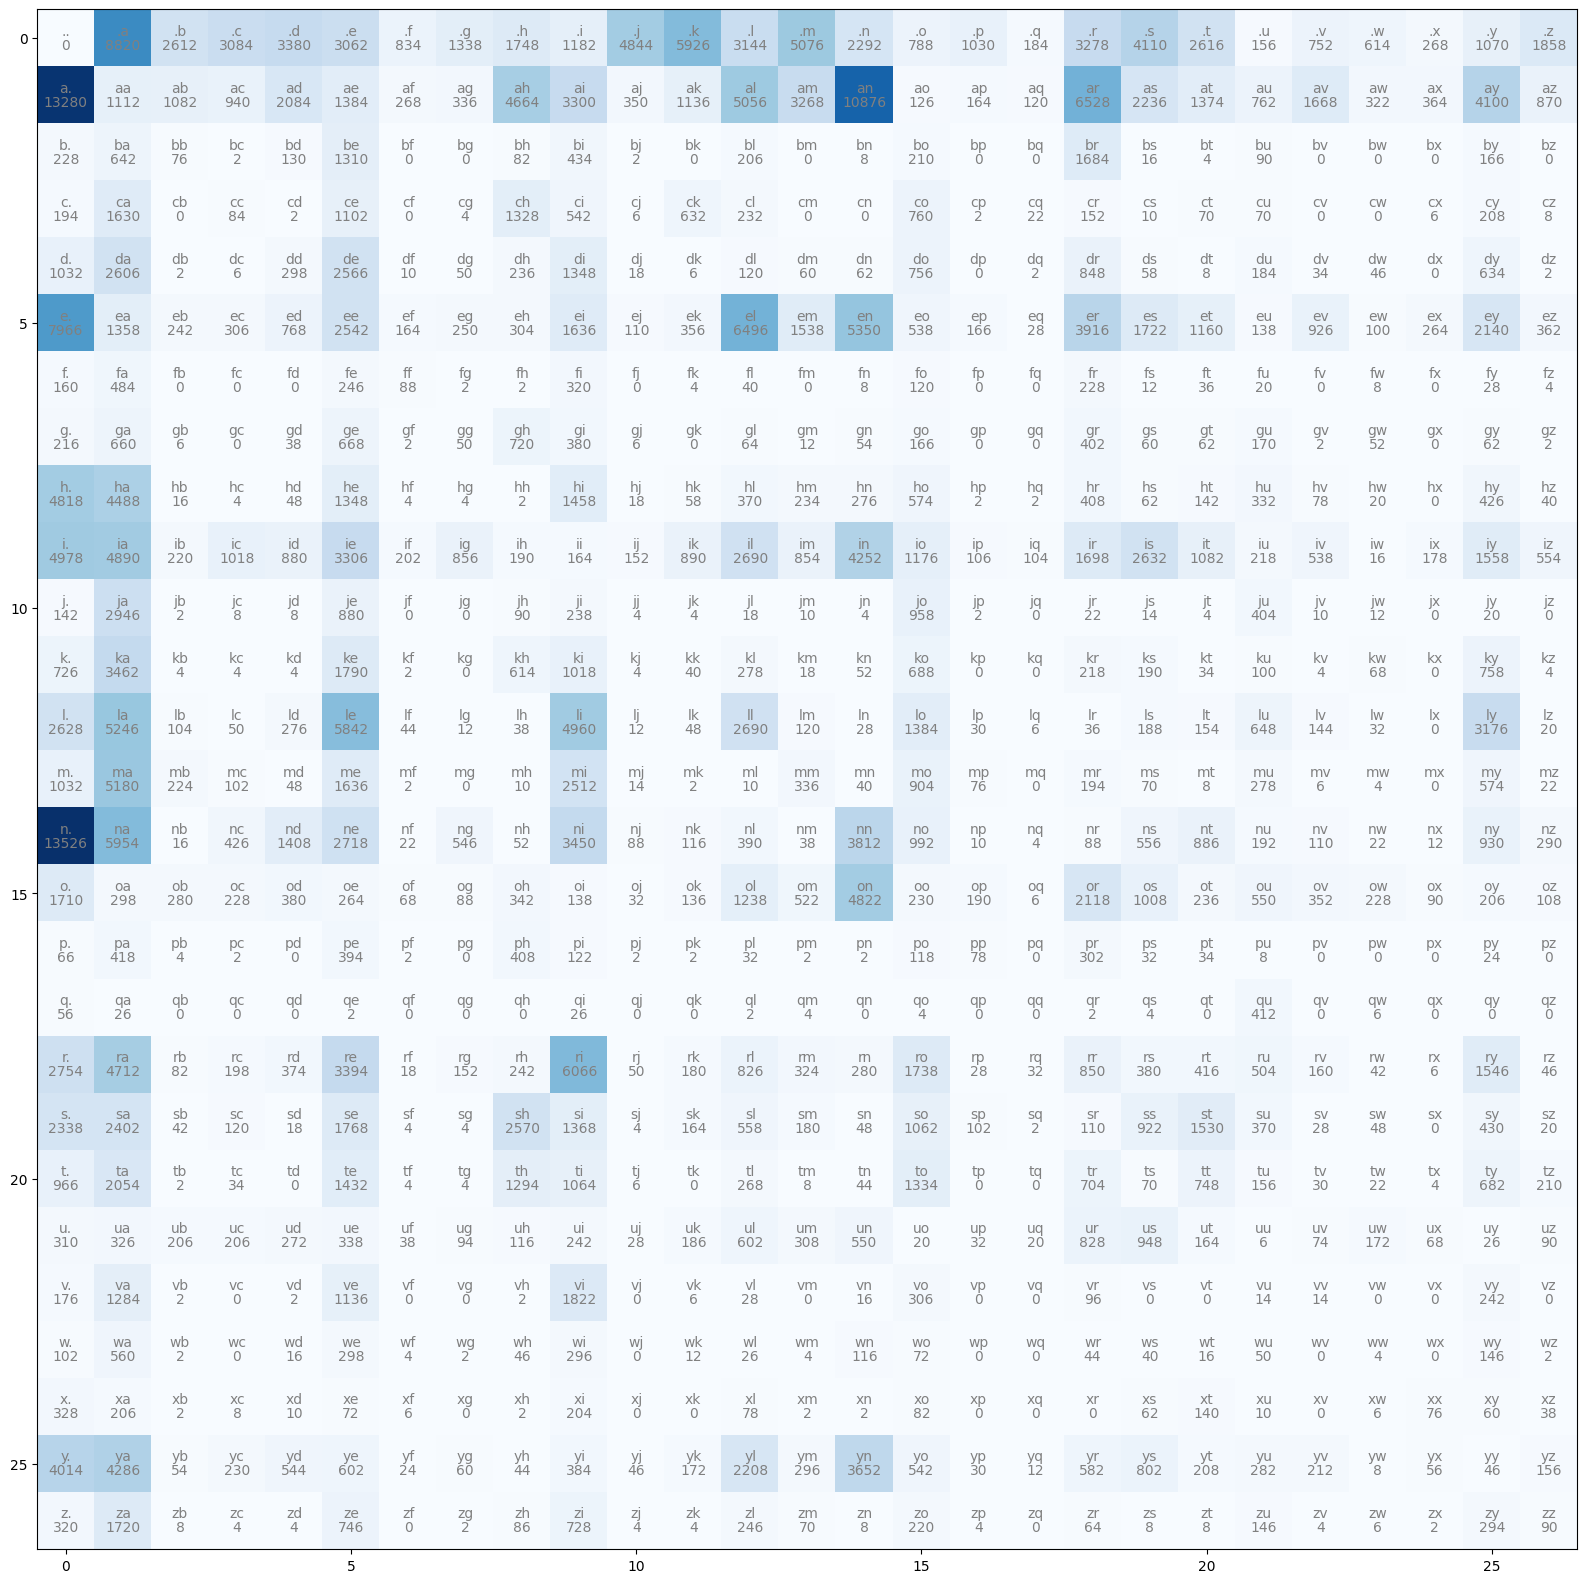

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j,i,chstr,ha='center',va="bottom",color="gray")
        plt.text(j,i,N[i,j].item(),ha='center',va="top",color="gray")
plt.axes('off')

#Error in the matrix IDK whats causing the issue.

In [ ]:
N[0]

In [21]:
p = N[0].float()
p = p/p.sum()
p
#Creating a Distribution then we try to sample based on this distribution using torch.multinomial

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

Sampling from a distribution

In [22]:
g = torch.Generator().manual_seed(2147675467) #Seeds a Generator
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
ix
itos[ix]

'm'

In [23]:
g = torch.Generator().manual_seed(2147675467) #Seeds a Generator
p = torch.rand(3,generator=g)
p = p/p.sum() #When ever i run this cell i keep getting the same output as im using the same generator object thats seeding it
p

tensor([0.0832, 0.3905, 0.5263])

In [24]:
#Using torch Multinomial to draw samples from it
torch.multinomial(p,num_samples=20,replacement=True,generator=g) 

tensor([2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1])

In [25]:
p.shape

torch.Size([3])

In [26]:
P = (N+1).float()
P /= P.sum(1,keepdim=True) #Inplace Operations save memory rather than using memory to create a new variable of a sort
P[1].sum()
#Broadcasting, COpies the counts and does emelemt wise division


tensor(1.)

In [27]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0
    while True:
        #p=N[ix].float()
        #p = p/p.sum()
        #Optimized 
        
        p = P[ix]
        
        #p = torch.ones(27)/27.0
        #This is a uniform distribution, where everything is equally likely so we get even more jargon
        
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))  

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


Evaluation of the model

In [28]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    char = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(char,char[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        n+=1
        log_likelihood += logprob
        print(f'{ch1}{ch2}:prob: {prob:4f},logProb: {logprob:.4f}')
nll = -1*log_likelihood
print(f'{log_likelihood=}')
print(f'nll = {-1*log_likelihood}')
print(f'avgnll = {-1*log_likelihood/n}')

.e:prob: 0.047790,logProb: -3.0409
em:prob: 0.037653,logProb: -3.2793
mm:prob: 0.025317,logProb: -3.6763
ma:prob: 0.389227,logProb: -0.9436
a.:prob: 0.195894,logProb: -1.6302
.o:prob: 0.012310,logProb: -4.3973
ol:prob: 0.077949,logProb: -2.5517
li:prob: 0.177540,logProb: -1.7286
iv:prob: 0.015214,logProb: -4.1856
vi:prob: 0.352407,logProb: -1.0430
ia:prob: 0.138051,logProb: -1.9801
a.:prob: 0.195894,logProb: -1.6302
.a:prob: 0.137628,logProb: -1.9832
av:prob: 0.024618,logProb: -3.7043
va:prob: 0.248405,logProb: -1.3927
a.:prob: 0.195894,logProb: -1.6302
log_likelihood=tensor(-38.7971)
nll = 38.797122955322266
avgnll = 2.4248201847076416


In [29]:
#Goal : Maximize the likelihood of data w.r.t modelparameters(Statistical Modeling)
#Equivalent to maximizing the log likelihood(Coz log is monotonic)
#Equivalent to minimizing negative log likelihood and also average negative log likelihood


Creating a NN for this Bigram moodel

In [30]:
#Creating a training data set of bigrams (x,y)
xs,ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [31]:
xs

tensor([ 0,  5, 13, 13,  1])

In [32]:
ys

tensor([ 5, 13, 13,  1,  0])